In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [100]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [101]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
X = titanic_data.drop(["PassengerId", 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [104]:
X = pd.get_dummies(X)

In [105]:
X = X.fillna({'Age': X.Age.median()})

In [106]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [107]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [108]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [109]:
titanic_fit = clf.fit(X, y)

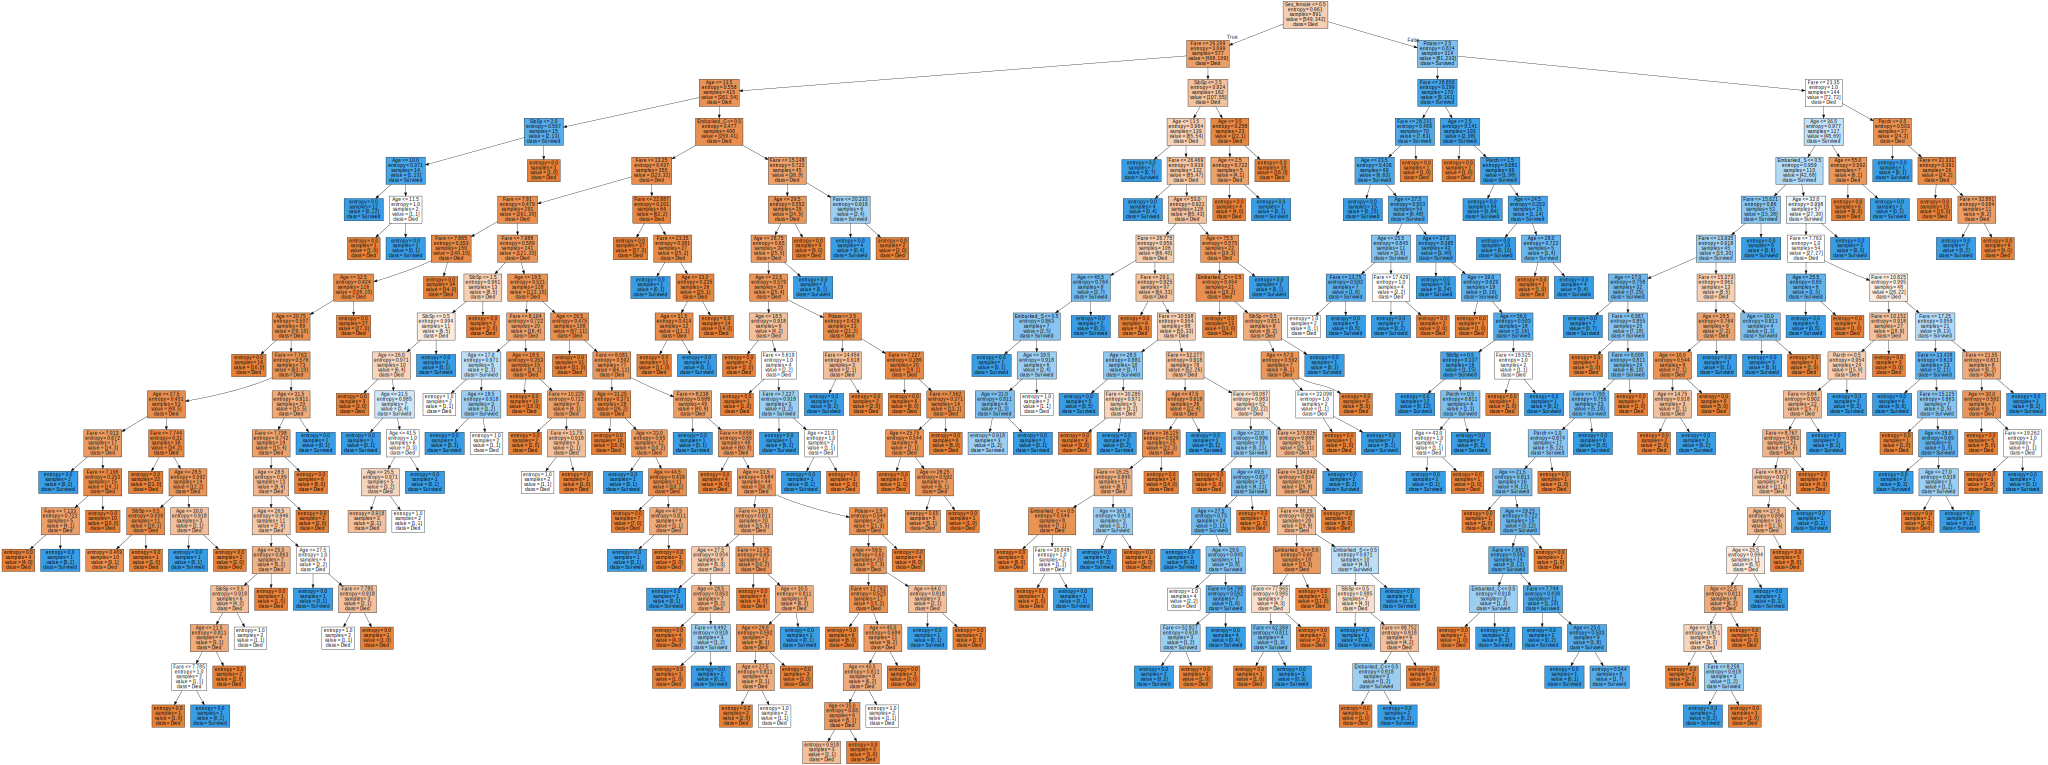

In [110]:
graph = Source(tree.export_graphviz(clf, out_file=None, \
                                   feature_names=list(X), \
                                    class_names=['Died', 'Survived'], \
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
clf.score(X_train, y_train)

0.9714765100671141

In [114]:
clf.score(X_test, y_test)

0.9966101694915255

In [115]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [116]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [117]:
clf.score(X_train, y_train)

0.8406040268456376

In [118]:
clf.score(X_test, y_test)

0.8101694915254237

In [119]:
max_deprh_valuses = range(1, 100)

In [120]:
scores_data = pd.DataFrame()

In [121]:
for max_depth in max_deprh_valuses:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                   'cross_val_score': mean_cross_val_score})
    
    scores_data = scores_data.append(temp_score_data)

C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dat

C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dat

C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\TatarnikovVS\AppData\Local\Temp\ipykernel_13280\3916417142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dat

In [122]:
type(scores_data)

pandas.core.frame.DataFrame

In [123]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


In [124]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [125]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.773543
293,96,cross_val_score,0.776905
294,97,cross_val_score,0.773543
295,98,cross_val_score,0.768501


In [126]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.800350
207,10,cross_val_score,0.802031


<Axes: xlabel='max_depth', ylabel='score'>

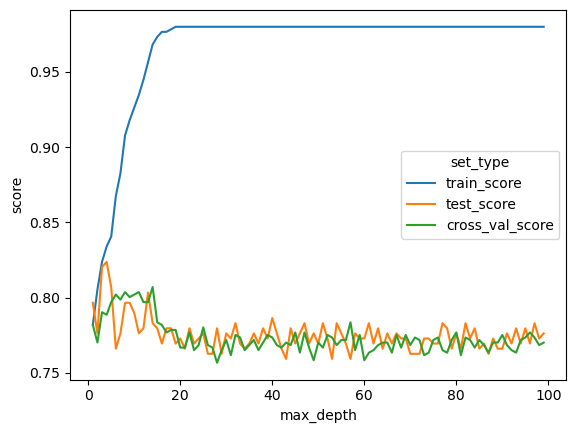

In [127]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [130]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
clf = tree.DecisionTreeClassifier()

In [133]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [134]:
grid_Search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [135]:
grid_Search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [136]:
grid_Search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [137]:
best_clf = grid_Search_cv_clf.best_estimator_

In [138]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [139]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [140]:
y_pred = best_clf.predict(X_test)

In [141]:
precision_score(y_test, y_pred)

0.8125

In [142]:
recall_score(y_test, y_pred)

0.65

In [143]:
f1_score(y_test, y_pred)

0.7222222222222223

In [144]:
y_predicted_prob = best_clf.predict_proba(X_test)

<Axes: >

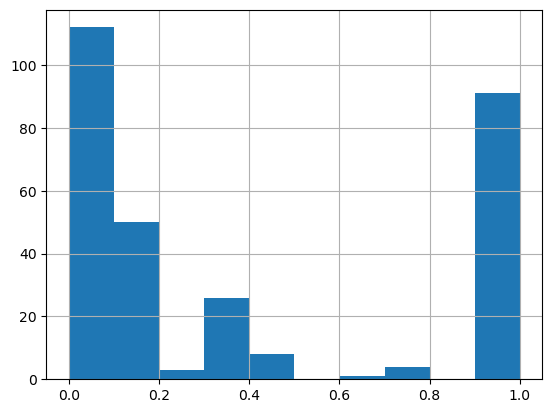

In [145]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [146]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [147]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

In [148]:
precision_score(y_test, y_pred)

0.8241758241758241

In [149]:
recall_score(y_test, y_pred)

0.625

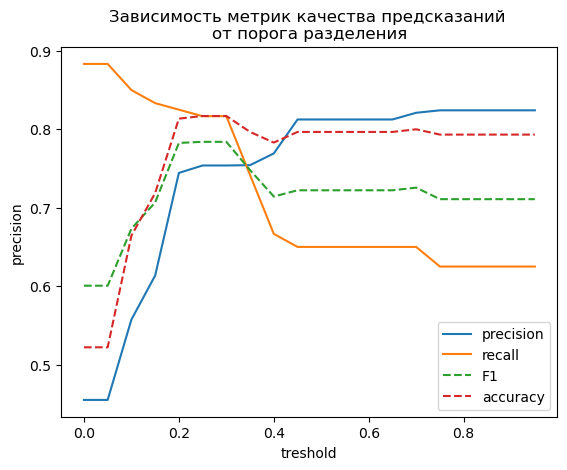

In [150]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_scores(tr):
  test_pred = np.where(best_clf.predict_proba(X_test)[:,1]>tr, 1, 0)
  precision = precision_score(y_test, test_pred)
  recall = recall_score(y_test, test_pred)
  accuracy = accuracy_score(y_test, test_pred)
  f1 = f1_score(y_test, test_pred)
  return precision, recall, f1, accuracy

lst_precision, lst_recall, lst_f1, lst_accuracy = [], [], [], []
for tr in np.arange(0,1,0.05):
    precision, recall, f1, accuracy = get_scores(tr)
    lst_precision.append(precision) 
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_accuracy.append(accuracy)

monitor = pd.DataFrame({'treshold':np.arange(0,1,0.05), 'precision':lst_precision,'recall':lst_recall, 'f1':lst_f1, 'accuracy':lst_accuracy})

sns.lineplot(data=monitor, x='treshold', y='precision', label='precision')
sns.lineplot(data=monitor, x='treshold', y='recall', label='recall')
sns.lineplot(data=monitor, x='treshold', y='f1', label='F1', linestyle='--')
sns.lineplot(data=monitor, x='treshold', y='accuracy', label='accuracy', linestyle='--')
plt.title('Зависимость метрик качества предсказаний \nот порога разделения')
plt.show()

In [161]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [162]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

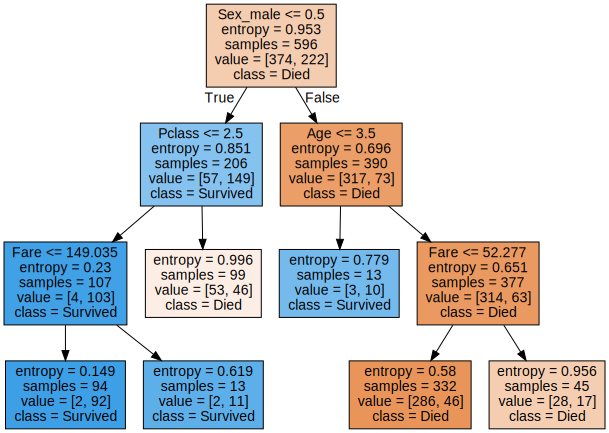

In [163]:
graph = Source(tree.export_graphviz(clf, out_file=None
    , feature_names=list(X), class_names=['Died', 'Survived']
    , filled=True))

display(SVG(graph.pipe(format='svg')))